In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data_df = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data_df = pd.read_csv(clinical_trial_data_to_load)


# Combine the data into a single dataset
mouse_drug_clin_trial_merge_df = pd.merge(mouse_drug_data_df, clinical_trial_data_df, on="Mouse ID")

mouse_drug_clin_trial_merge_df

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
...,...,...,...,...,...
1901,j235,Placebo,0,45.000000,0
1902,j235,Placebo,5,46.588820,0
1903,j235,Placebo,10,48.018788,1
1904,j235,Placebo,15,51.161138,1


In [2]:
mouse_drug_clin_trial_merge_df.columns

Index(['Mouse ID', 'Drug', 'Timepoint', 'Tumor Volume (mm3)',
       'Metastatic Sites'],
      dtype='object')

In [5]:
mean_tumor_vol_grouped_drug_TP = mouse_drug_clin_trial_merge_df.groupby(["Drug", "Timepoint"])
mean_tumor_volume = mean_tumor_vol_grouped_drug_TP["Tumor Volume (mm3)"].mean()

# Convert to DataFrame

mean_tumor_vol_group_drug_TP_df = pd.DataFrame(mean_tumor_volume).reset_index()

# Preview DataFrame
mean_tumor_vol_group_drug_TP_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [6]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

sem_tumor_vol_grouped_drug_TP = mouse_drug_clin_trial_merge_df.groupby(["Drug", "Timepoint"])
sem_tumor_volume = sem_tumor_vol_grouped_drug_TP["Tumor Volume (mm3)"].sem()
sem_tumor_volume

# Convert to DataFrame

sem_tumor_vol_group_drug_TP_df = pd.DataFrame(sem_tumor_volume).reset_index()

# Preview DataFrame

sem_tumor_vol_group_drug_TP_df.head(15)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
5,Capomulin,25,0.881642
6,Capomulin,30,0.934460
7,Capomulin,35,1.052241
8,Capomulin,40,1.223608
9,Capomulin,45,1.223977


In [4]:
#Drug_rows = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
#Drug_columns = ['Drug']
#mouse_drug_clin_trial_merge_df.loc = [Drug_rows, Drug_columns]
#mouse_drug_clin_trial_merge_df

#To select rows whose column value is in list
drugs = ['Ceftamin', 'Naftisol', 'Propriva', 'Ramicane', 'Stelasyn','Zoniferol']
mouse_drug_clin_trial_merge_df_reduce = mouse_drug_clin_trial_merge_df[~mouse_drug_clin_trial_merge_df.Drug.isin(drugs)]
mouse_drug_clin_trial_merge_df_reduce

#select_drugs = mouse_drug_clin_trial_merge_df.loc[['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'], ['Drug']]

#select_drugs
# Display the data table for preview
#mouse_drug_clin_trial_merge_df.sort_values("Timepoint").head()

#mouse_drug_clin_trial_merge_df.sort_values("Timepoint").head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
393,q119,Ketapril,0,45.000000,0
394,q119,Ketapril,5,47.864440,0
395,q119,Ketapril,10,51.236606,0
396,n923,Ketapril,0,45.000000,0
397,n923,Ketapril,5,45.824881,0
...,...,...,...,...,...
1901,j235,Placebo,0,45.000000,0
1902,j235,Placebo,5,46.588820,0
1903,j235,Placebo,10,48.018788,1
1904,j235,Placebo,15,51.161138,1


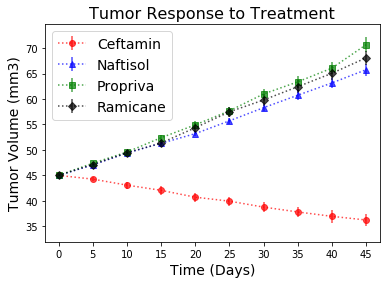

In [12]:
# set up variables for plots
selected_drugs = ['Capomulin','Infubinol', 'Ketapril','Placebo']
colors = ['red','blue','green','black']
formats = ['o','^','s','D']

#plot tumor vol using matplotlib, including error bars

fig, ax = plt.subplots()

#loop through the drugs to include on the plot
for i in range(0,len(selected_drugs)):

   
    #x-axis is timepoint for the particular drug
    drug_data_to_plot = mean_tumor_vol_group_drug_TP_df.loc[mean_tumor_vol_group_drug_TP_df['Drug'] == selected_drugs[i],:]
    x_axis = drug_data_to_plot['Timepoint']
      
    #y-axis is tumor volume
    y_axis = drug_data_to_plot['Tumor Volume (mm3)'] 

    #errors is the standard error
    err_data_to_plot = sem_tumor_vol_group_drug_TP_df.loc[sem_tumor_vol_group_drug_TP_df['Drug'] == selected_drugs[i],:]
    errors = err_data_to_plot['Tumor Volume (mm3)']
   
   
    #plot the data and the error
    ax.errorbar(x_axis, y_axis, yerr=errors, fmt=formats[i], marker = formats[i], color=colors[i],
            alpha=0.7, label=drugs[i],ls='dotted')
           
    ax.set_xlabel("Time (Days)",fontsize=14)
    ax.set_ylabel("Tumor Volume (mm3)",fontsize=14)
    ax.set_title("Tumor Response to Treatment",fontsize=16)
    #add the legend
    ax.legend(loc="best", fontsize=14,fancybox=True)
    
    plt.xticks(x_axis, x_axis)
    ax.set_xlim(-2, x_axis.max() + 2)
    ax.set_ylim(mean_tumor_vol_group_drug_TP_df['Tumor Volume (mm3)'].min()-3, mean_tumor_vol_group_drug_TP_df['Tumor Volume (mm3)'].max()+4)
        
#end loop

plt.show()